<a href="https://colab.research.google.com/github/88FaHaD/ML/blob/main/evaluationandcallbackdunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [20]:
A =tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

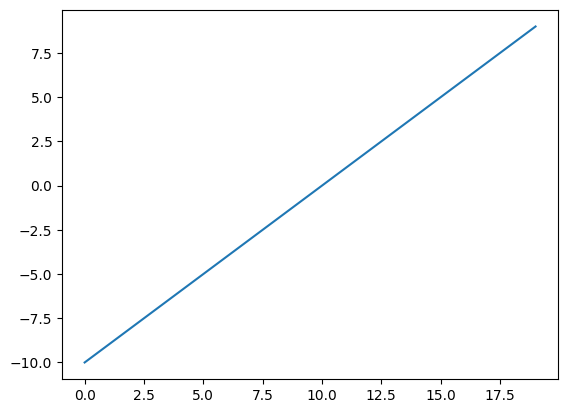

In [21]:
plt.plot(A)

# Applying Sigmoid function

In [22]:
sigmoid_A=tf.sigmoid(A)
sigmoid_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105123e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425877e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752736e-01, 9.9908894e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

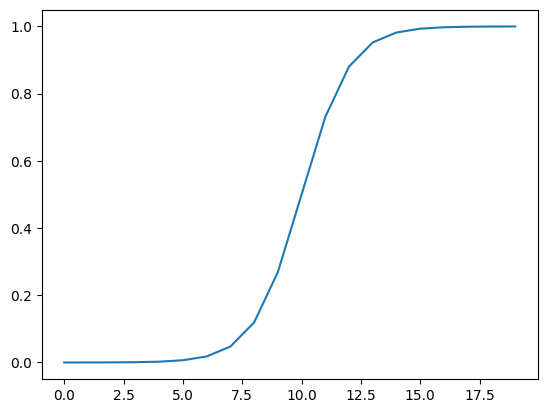

In [23]:
plt.plot(sigmoid_A)

# Relu function

In [24]:
relu_a=tf.nn.relu(A)
relu_a

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

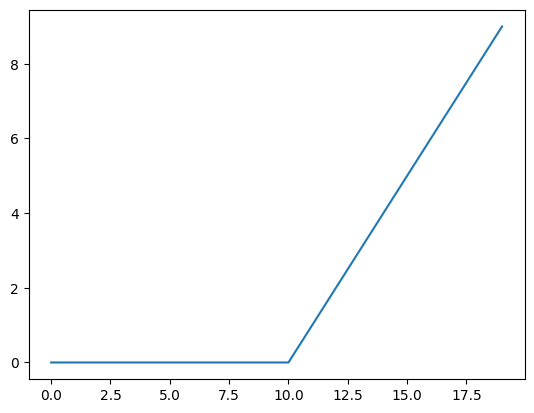

In [25]:
plt.plot(relu_a)

# Using linear function


In [26]:
linear_A =tf.keras.activations.linear(A)
linear_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

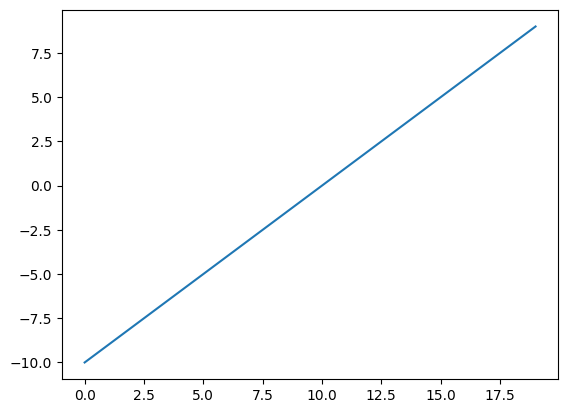

In [27]:
plt.plot(linear_A)

In [28]:
A == linear_A

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [29]:
from sklearn.datasets import make_circles

#MAKE 1000 SAMPLES
n_samples=1000

#Make circles
x,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

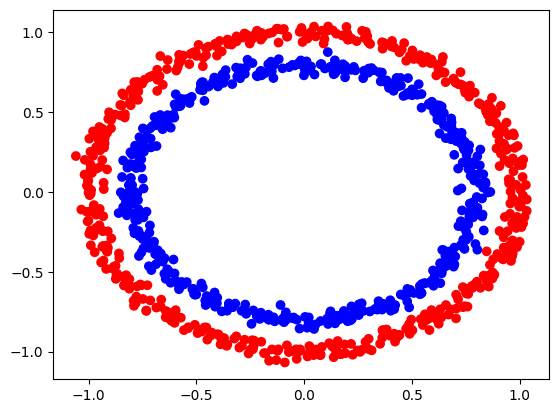

In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
# Define custom colormap
colors = [(1, 0, 0), (0, 0, 1)]  # Red to Blue
n_bins = 100  # Number of bins
cmap_name = 'red_blue'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Scatter plot with custom colormap
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cm)

In [31]:
model4=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy']
)

history=model4.fit(x,y,epochs=100,verbose=0)

In [32]:
model4.evaluate(x,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0121 - accuracy: 0.9950


[0.01210760697722435, 0.9950000047683716]

In [68]:
# Split data into train and test sets
x_train, y_train = x[:800], y[:800] # 80% of the data for the training set
x_test, y_test = x[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
x_train.shape, x_test.shape # 800 examples in the training set, 200 examples in the test set

((800, 2), (200, 2))

Text(0.5, 1.0, 'model loss curve')

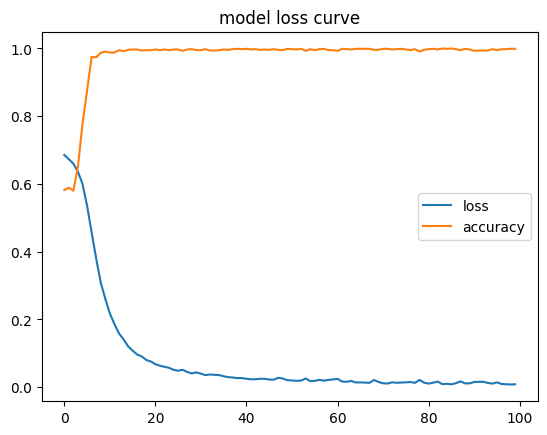

In [69]:
import pandas as pd

history_pd=pd.DataFrame(history.history)
history_pd.plot()
plt.title('model loss curve')

# Model with callback functiosn

In [70]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy',
              optimizer='Adam',
              metrics=['accuracy']
)

scheduler_lr=tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 *10 **(epoch/20))

newhistory=model4.fit(x_train,y_train,epochs=50,callbacks=scheduler_lr,verbose=0)

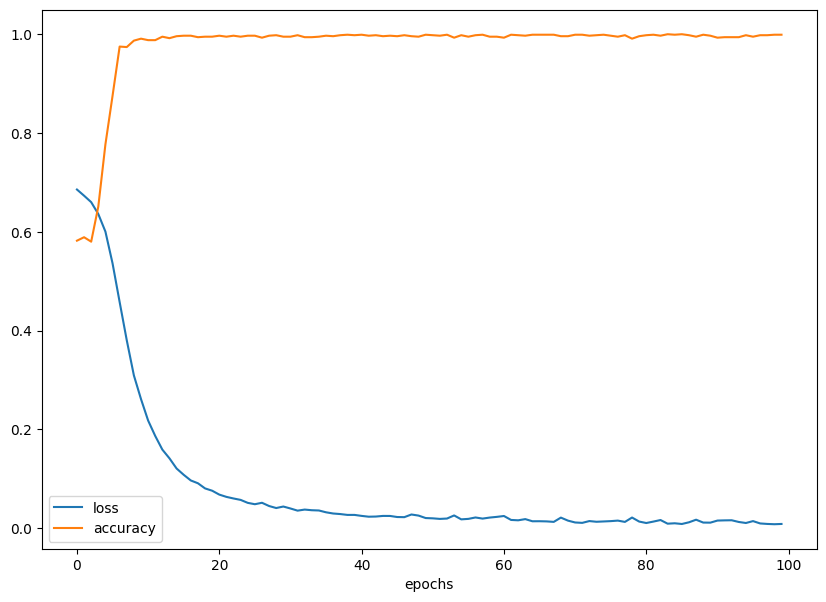

In [71]:

history_pd=pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs')

In [74]:

# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_9.fit(x_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6921 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6920 - accuracy: 0.5050 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6919 - accuracy: 0.5050 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5038 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6918 - accuracy: 0.5050 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5038 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5025 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6915 - accuracy: 0.5075 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

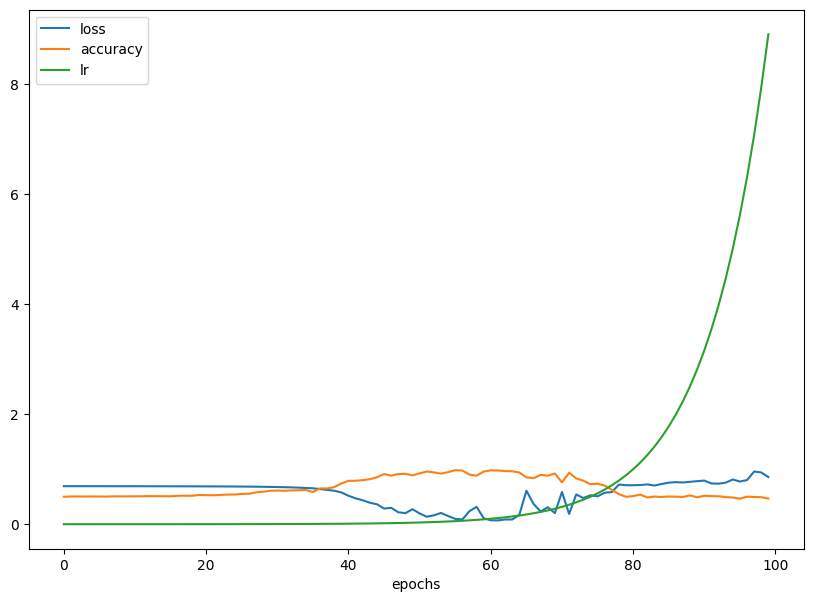

In [75]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

NameError: name 'model_8' is not defined